## Practical 5

In this practical I have implemeted the K-Nearest Neighbour algorithm for the **Iris Dataset**.

Two methods are illustrated for calculating the KNN:
 - In-built method of sklearn
 - Using Cosine Similarity (from scratch)

In [23]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, datasets
import matplotlib.pyplot as plt

In [14]:
X, y = datasets.load_iris(return_X_y = True)

In [49]:
def load_data1():
    # Splitting the data into test and train 
    X_test = []
    X_train = []


    X_test[0:5] = X[0:5,:]
    X_train[0:45] = X[5:50,:]
    X_test[5:10] = X[50:55,:]
    X_train[45:90] = X[55:100,:]
    X_test[10:15] = X[100:105,:]
    X_train[90:135] = X[105:150,:]

    X_train = np.array(X_train)
    X_test = np.array(X_test)


    y_test = []
    y_train = []


    y_test[0:5] = y[0:5]
    y_train[0:45] = y[5:50]
    y_test[5:10] = y[50:55]
    y_train[45:90] = y[55:100]
    y_test[10:15] = y[100:105]
    y_train[90:135] = y[105:150]

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return X_train, X_test, y_train, y_test

In [50]:
def load_data2():
    X_test = []
    X_train = []


    X_test[0:15] = X[0:15,:]
    X_train[0:35] = X[15:50,:]
    X_test[15:30] = X[50:65,:]
    X_train[35:70] = X[65:100,:]
    X_test[30:45] = X[100:115,:]
    X_train[70:105] = X[115:150,:]

    X_train = np.array(X_train)
    X_test = np.array(X_test)

    
    y_test = []
    y_train = []


    y_test[0:15] = y[0:15]
    y_train[0:35] = y[15:50]
    y_test[15:30] = y[50:65]
    y_train[35:70] = y[65:100]
    y_test[30:45] = y[100:115]
    y_train[70:105] = y[115:150]

    y_train = np.array(y_train)
    y_test = np.array(y_test)
    
    return X_train, X_test, y_train, y_test

In [51]:
def mse(y_pred, y):
    n = y.shape[0]
    cost = (2/n)*np.sum((y-y_pred)**2)
    return cost

#### Type 1:

In this method we have used the function available in **sklearn** to implement the KNN. We hsve tried various different values of **K parameter** and plotted the cost associated with it.

In [65]:
def type1(X_train, X_test, y_train, y_test):
    costs = []
    weights='uniform'

    for i in range(1,30):
        n_neighbors=i
    
        clf = KNeighborsClassifier(n_neighbors)
        clf.fit(X_train, y_train)
    
        predictions = clf.predict(X_test)
        cost = mse(predictions, y_test)
    
        costs.append(cost)
        
        
    plt.figure(figsize=(20,8))
    plt.plot(range(1,30),costs)
    
    return predictions

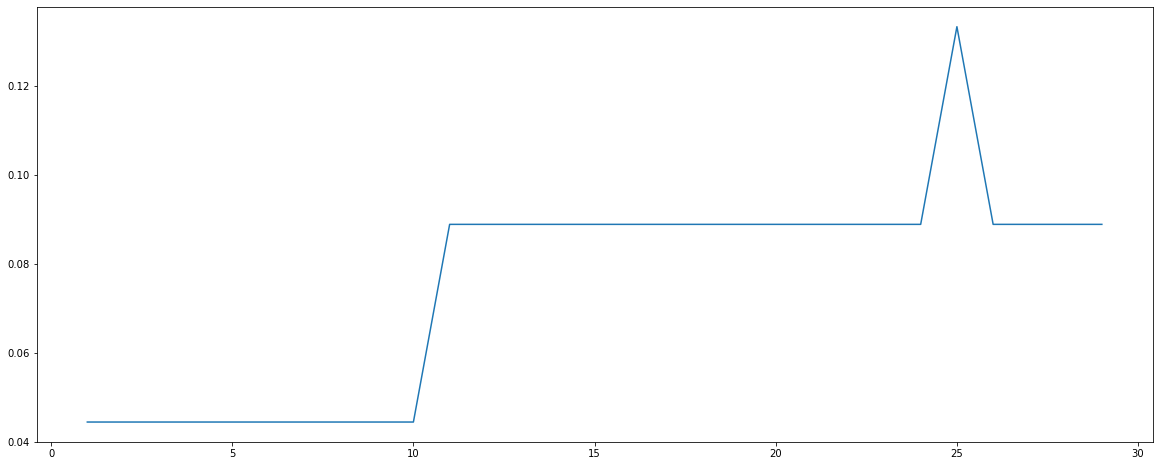

In [66]:
X_train, X_test, y_train, y_test = load_data2()
pred = type1(X_train, X_test, y_train, y_test)

In [67]:
metrics.confusion_matrix(y_test, pred)

array([[15,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 14]], dtype=int64)

#### Type 2

In this part, I have implemeted the KNN using the **Cosine Similarity**. 

In [56]:
def takef(elem):
    return elem[0]

In [57]:
def weightedKNN(similarity, k):
    
    n = k
    #n = int(input("Enter the value of K"))

    sim1=0;sim2=0;sim3=0
    for i in range(n):
        if(similarity[i][1]==0):
            sim1 = sim1 + similarity[i][0]
        elif(similarity[i][1]==1):
            sim2 = sim2 + similarity[i][0]
        else:
            sim3 = sim3 + similarity[i][0]
                
    if(sim1>sim2 and sim1>sim3):
        return 0
    elif(sim2>sim1 and sim2>sim3):
        return 1
    else:
        return 2

In [63]:
def type2(X_train, X_test, y_train, y_test, k):
    
    for j in range(X_test.shape[0]):
        test_x = X_test[j]
        similarity = []
        x2 = np.sqrt(np.dot(test_x.T, test_x))

        for i in range(X_train.shape[0]):
            sim1 = np.dot(X_train[i,:], test_x)
            x1 = np.sqrt(np.dot(X_train[i,:].T,X_train[i,:]))
            similarity.append([(sim1/(x2*x1)), y_train[i], i+1])
    
    
        similarity.sort(key=takef, reverse=True)
        p_class = weightedKNN(similarity, k)
        
        print("The predicted class for {} is {}. The actual class is {}".format(test_x, p_class, y_test[j]))

In [64]:
X_train, X_test, y_train, y_test = load_data2()
type2(X_train, X_test, y_train, y_test, 7)

The predicted class for [5.1 3.5 1.4 0.2] is 0. The actual class is 0
The predicted class for [4.9 3.  1.4 0.2] is 0. The actual class is 0
The predicted class for [4.7 3.2 1.3 0.2] is 0. The actual class is 0
The predicted class for [4.6 3.1 1.5 0.2] is 0. The actual class is 0
The predicted class for [5.  3.6 1.4 0.2] is 0. The actual class is 0
The predicted class for [5.4 3.9 1.7 0.4] is 0. The actual class is 0
The predicted class for [4.6 3.4 1.4 0.3] is 0. The actual class is 0
The predicted class for [5.  3.4 1.5 0.2] is 0. The actual class is 0
The predicted class for [4.4 2.9 1.4 0.2] is 0. The actual class is 0
The predicted class for [4.9 3.1 1.5 0.1] is 0. The actual class is 0
The predicted class for [5.4 3.7 1.5 0.2] is 0. The actual class is 0
The predicted class for [4.8 3.4 1.6 0.2] is 0. The actual class is 0
The predicted class for [4.8 3.  1.4 0.1] is 0. The actual class is 0
The predicted class for [4.3 3.  1.1 0.1] is 0. The actual class is 0
The predicted class 